`IMPORT NECESSARY MODULES/LIBRARY.`

In [1]:
import tensorflow as tf 
import os
import cv2 as cv 
import keras
import numpy as np 
import math
from matplotlib import pyplot as plt 
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

`DEFINING A PLOTTING FUNCTION TO BE USED LATER.`

In [2]:
def imagesPlot(arr_images):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()
    for image, ax in zip(arr_images, axes):
        ax.imshow(image)
        plt.tight_layout()
        plt.axis("off")
        plt.show()

`LOAD THE DATASET.`

In [3]:
data_dir = "picture_data"

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv.imread(image_path)
        except Exception as err:
            print(f"Issues with image {image_path}")

In [5]:
data  = tf.keras.utils.image_dataset_from_directory("picture_data")

Found 516 files belonging to 2 classes.


2024-01-02 16:37:53.885445: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-01-02 16:37:53.885474: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-02 16:37:53.885477: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-02 16:37:53.885522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-02 16:37:53.885536: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


`SPLIT THE DATASETS TO TRAINING & VALIDATION SET.`

In [6]:
train_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 250,
    #batch_size = batch_size
)

Found 516 files belonging to 2 classes.
Using 413 files for training.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 250,
    #batch_size = batch_size
)

Found 516 files belonging to 2 classes.
Using 103 files for validation.


`Load Test Images.`

In [8]:
test_dir = "test_data"

non_defect_dir = "test_data/defect"
os.makedirs(non_defect_dir, exist_ok = True)

In [9]:
k = 0
for image in os.listdir(test_dir):
    image_path = os.path.join(test_dir, image)
    image = cv.imread(image_path)

    if image is not None:

        #image = image.numpy()
        image = cv.resize(image, (255, 255))
        image_name = f"image{k}.jpg"
        k += 1

        non_defect_path = os.path.join(non_defect_dir, image_name)
        cv.imwrite(non_defect_path, image)
    else:
        print(f"Skipping non-image file: {image_path}")

Skipping non-image file: test_data/defect
Skipping non-image file: test_data/ppp


In [10]:
for image_class in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try:
            img = cv.imread(image_path)
        except Exception as err:
            print(f"Issues with image {image_path}")

In [11]:
test  = tf.keras.utils.image_dataset_from_directory("test_data")

Found 14 files belonging to 2 classes.


In [12]:
normalization = tf.keras.layers.Rescaling(1./255)

test_set = test.map(lambda x, y: (normalization(x), y))

`WRITE TRAINNING & VALIDATION SET TO DIRECTORY.`

BASE ON THEIR CLASSES.

In [13]:
train_directory = "data/train"

os.makedirs(train_directory, exist_ok = True)

In [14]:
class_images = { }

for images, labels in train_set:
    #print(labels)
    #label = "label" +str(count)
    for i in range(images.shape[0]):
        #print(i)
        image = images[i].numpy()
        label = labels[i].numpy()

        label_str = str(label)

        class_directory = os.path.join(train_directory, label_str)
        os.makedirs(class_directory, exist_ok = True)

        if label_str not in class_images:
            class_images[label_str] = [ ]

        class_images[label_str].append(image)


for label_str, image_list in class_images.items():
    class_directory = os.path.join(train_directory, label_str)

    for i, image in enumerate(image_list):

        image_filename = f"image{i}.jpg"
        image_path = os.path.join(class_directory, image_filename)
        tf.keras.utils.save_img(image_path, image)

print("Training set saved to the training directory.")

Training set saved to the training directory.


In [15]:
validation_directory = "data/validation"

os.makedirs(validation_directory, exist_ok = True)

In [16]:
class_images = { }

for images, labels in validation_set:
    #print(labels)
    #label = "label" +str(count)
    for i in range(images.shape[0]):
        #print(i)
        image = images[i].numpy()
        label = labels[i].numpy()

        label_str = str(label)

        class_directory = os.path.join(validation_directory, label_str)
        os.makedirs(class_directory, exist_ok = True)

        if label_str not in class_images:
            class_images[label_str] = [ ]

        class_images[label_str].append(image)


for label_str, image_list in class_images.items():
    class_directory = os.path.join(validation_directory, label_str)

    for i, image in enumerate(image_list):

        image_filename = f"image{i}.jpg"
        image_path = os.path.join(class_directory, image_filename)
        tf.keras.utils.save_img(image_path, image)

print("Validation set saved to the validation directory.")

Validation set saved to the validation directory.


Number of Training sets.

In [17]:
train_directory = train_directory
train_0_dir = os.path.join(train_directory, "0")

train_1_dir = os.path.join(train_directory, "1")

In [18]:
num_0_train = len(os.listdir(train_0_dir))
num_1_train = len(os.listdir(train_1_dir))

total_train = num_0_train + num_1_train
print(total_train)

413


Number of Validation sets.

In [19]:
validation_directory = validation_directory

val_0_dir = os.path.join(validation_directory, "0")
val_1_dir = os.path.join(validation_directory, "1")

In [20]:
num_0_val = len(os.listdir(val_0_dir))
num_1_val = len(os.listdir(val_1_dir))

total_validation = num_0_val + num_1_val
print(total_validation)

103


`DATA AUGMENTATION.`


* USING FLIP.
* ZOOM.
* ROTATION.

In [21]:
batch_size = 32
image_shape = 256

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [23]:
image_shape = 256
train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                          directory = train_directory,
                                          shuffle = True,
                                          target_size = (image_shape, image_shape))

Found 413 images belonging to 2 classes.


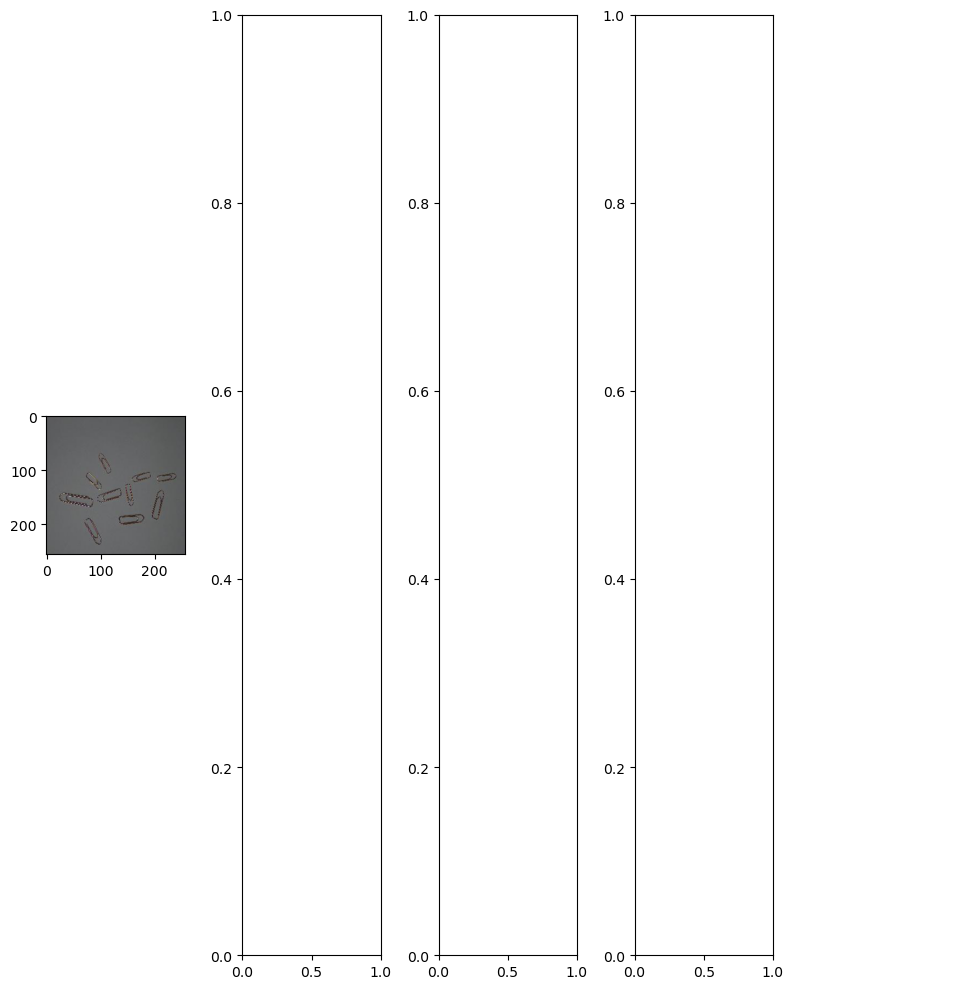

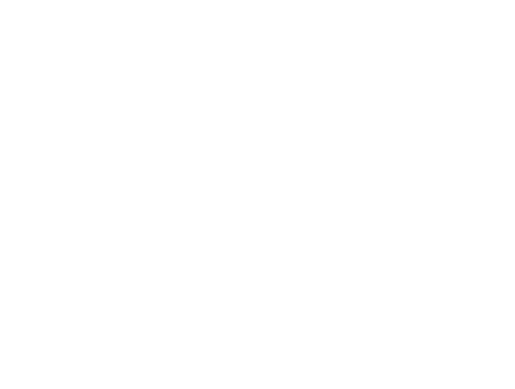

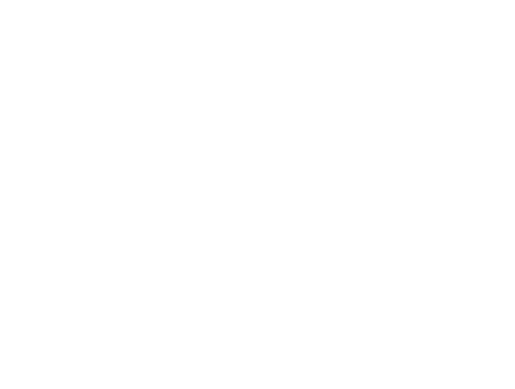

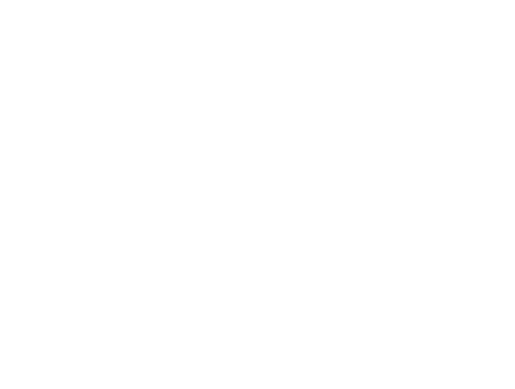

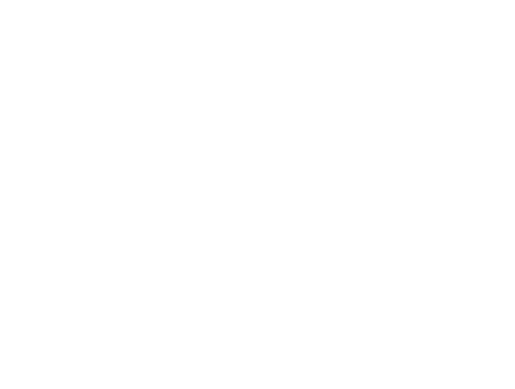

In [24]:
#TRANSFORMATION IN ACTION.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
imagesPlot(augmented_images)

Adding grayscaled images to augmentation pipeline.

In [25]:
# def gray_scale (imagex):
#     return tf.image.rgb_to_grayscale(imagex)

In [26]:
# ADDING ALL AUGMENTATION TOGETHER.

image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    #brightness_range = [0.5, 1.8],       #**
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
)

In [27]:
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                                     directory = train_directory,
                                                     shuffle = True,
                                                     target_size = (image_shape, image_shape),
                                                     class_mode = "binary")

Found 413 images belonging to 2 classes.


`Augmentation for Validation set.`

In [28]:
image_gen_validation = ImageDataGenerator(rescale = 1./255)

validation_data_gen = image_gen_validation.flow_from_directory(batch_size = batch_size,
                                                               directory = validation_directory,
                                                               target_size = (image_shape, image_shape),
                                                               class_mode = "binary")

Found 103 images belonging to 2 classes.


`BUILD THE BASE MODEL FOR CNN`

In [29]:
classes_num = 2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), 1, activation = tf.nn.relu, input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), 1, activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), 1, activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    #tf.keras.layers.Dropout(0.2),                                         #**
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    #tf.keras.layers.Dense(8, activation = tf.nn.softmax),                  #**

    tf.keras.layers.Dense(classes_num)

])

In [30]:
optimizer =  Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [32]:
logdir = "logs"

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
history = model.fit_generator(
    train_data_gen, 
    epochs = 20,
    steps_per_epoch = int(np.ceil(total_train / float(batch_size))),
    validation_data = validation_data_gen,
    validation_steps = int(np.ceil(total_validation / float(batch_size))),
    callbacks = [tensorboard_callback]
)

/var/folders/3w/6zx_6kyx4dqd7p83pv_69b800000gn/T/ipykernel_55888/2024658123.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20


2024-01-02 16:37:59.648208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-01-02 16:37:59.709977: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 5s 282ms/step - loss: 6.8815 - accuracy: 0.4939 - val_loss: 6.7154 - val_accuracy: 0.5534
Epoch 2/20
13/13 [==============================] - 3s 229ms/step - loss: 2.2965 - accuracy: 0.5230 - val_loss: 0.8289 - val_accuracy: 0.5534
Epoch 3/20
13/13 [==============================] - 3s 247ms/step - loss: 0.6629 - accuracy: 0.6513 - val_loss: 0.6882 - val_accuracy: 0.5534
Epoch 4/20
13/13 [==============================] - 3s 248ms/step - loss: 0.6257 - accuracy: 0.6755 - val_loss: 0.6040 - val_accuracy: 0.7961
Epoch 5/20
13/13 [==============================] - 3s 250ms/step - loss: 0.7301 - accuracy: 0.6925 - val_loss: 0.6579 - val_accuracy: 0.7379
Epoch 6/20
13/13 [==============================] - 3s 238ms/step - loss: 0.6272 - accuracy: 0.6150 - val_loss: 0.7547 - val_accuracy: 0.3981
Epoch 7/20
13/13 [==============================] - 3s 233ms/step - loss: 0.5522 - accuracy: 0.7070 - val_loss: 0.7503 - val_accuracy: 0.6602
Epoch 8/20
13/13 

`PLOT THE MODEL PERFORMANCE.`

In [35]:
acc = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
validation_loss = history.history["val_loss"]
epochs = 20
epoch_range = range(epochs)

In [36]:
print(f"Accuracy on validation set: {validation_accuracy}")

Accuracy on validation set: [0.553398072719574, 0.553398072719574, 0.553398072719574, 0.7961165308952332, 0.737864077091217, 0.3980582654476166, 0.6601941585540771, 0.7766990065574646, 0.7961165308952332, 0.7475728392601013, 0.7281553149223328, 0.6407766938209534, 0.7669903039932251, 0.8155339956283569, 0.8349514603614807, 0.8252426981925964, 0.8058252334594727, 0.9223300814628601, 0.893203854560852, 0.9223300814628601]


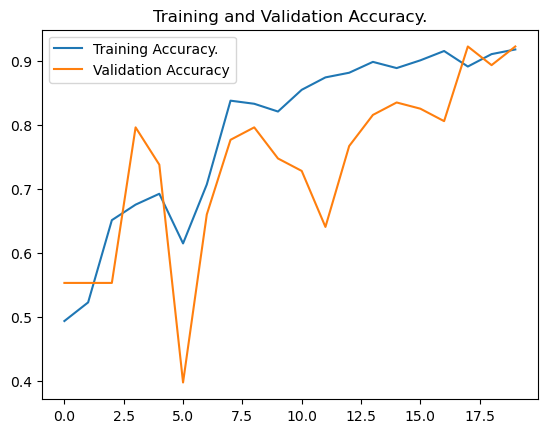

In [37]:
plt.plot(epoch_range, acc, label = "Training Accuracy.")
plt.plot(epoch_range, validation_accuracy, label = "Validation Accuracy")
plt.plot(loc = "lower right")
plt.title("Training and Validation Accuracy.")
plt.legend()
plt.show()

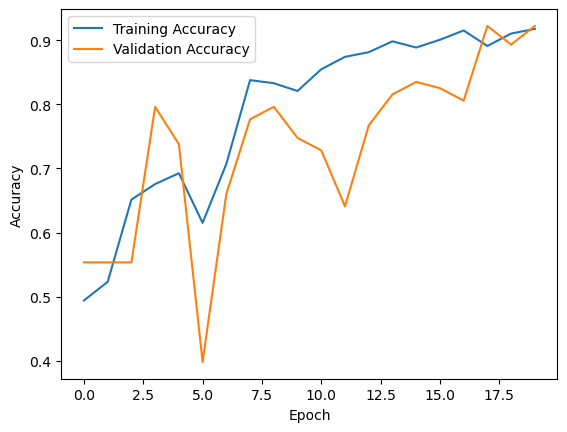

In [38]:
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

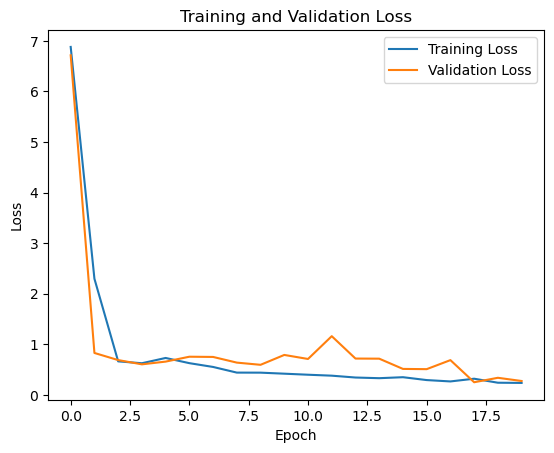

In [39]:
plt.plot(epoch_range, loss, label = "Training Loss")
plt.plot(epoch_range, validation_loss, label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

`NOTE`

Diffeent from the upstream with the following;
* Added 2 extra layers marked with comment-**
* Increased epochs & epoch_range to 20.
* Changed the loss  {REVERTED}

`Evaluate the Model.`

In [40]:
results = model.evaluate(train_data_gen)

13/13 [==============================] - 3s 220ms/step - loss: 0.2223 - accuracy: 0.9225


In [41]:
results

[0.22231104969978333, 0.9225181341171265]

`Try some predictions.`

In [42]:
predictions = model.predict(test_set, batch_size = batch_size)

1/1 [==============================] - 0s 174ms/step


In [43]:
print(predictions[:6])

[[  0.3347835   -2.430287  ]
 [  0.538142    -2.5977707 ]
 [  0.21794266  -2.1960247 ]
 [  0.5398434   -2.5936644 ]
 [  0.5497587   -2.5990314 ]
 [-12.872332    12.986169  ]]


In [44]:
predictions[4].shape

(2,)

In [45]:
np.sum(predictions[4])

-2.0492728

`Save the Model.`

MODEL PERFORMANCE TRACK : {
    "imageclassifier001: 89%
}

In [46]:
#model.save(os.path.join("models", "imageclassifier01v1.h5"))